In [1]:
import torch
import sys

print(f"🔥 PyTorch 버전: {torch.__version__}")
print(f"🐍 Python 버전: {sys.version.split()[0]}")

# 연산 장치 확인 (GPU가 있으면 cuda, 없으면 cpu)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"⚙️ 현재 사용 중인 연산 장치(Device): {device.upper()}")

if device == "cpu":
    print("⚠️ (참고) 현재 CPU 모드입니다. NAS에서는 정상입니다. 속도는 조금 느리지만 학습엔 문제없습니다.")
else:
    print("🚀 GPU 가속기가 활성화되었습니다! 초고속 연산이 가능합니다.")

🔥 PyTorch 버전: 2.9.1+cpu
🐍 Python 버전: 3.13.11
⚙️ 현재 사용 중인 연산 장치(Device): CPU
⚠️ (참고) 현재 CPU 모드입니다. NAS에서는 정상입니다. 속도는 조금 느리지만 학습엔 문제없습니다.


In [2]:
# 가상의 초음파 이미지 생성 (1장, 채널 1개(흑백), 높이 28, 너비 28)
# rand: 0~1 사이의 랜덤한 잡음(Noise) 생성
ultrasound_fake = torch.rand(1, 28, 28)

print(f"📸 텐서의 크기(Shape): {ultrasound_fake.shape}")
print(f"🔢 데이터 타입: {ultrasound_fake.dtype}")
print("\n[텐서 내부 데이터 일부 확인]")
print(ultrasound_fake[0, :5, :5]) # 왼쪽 위 5x5 픽셀의 값

📸 텐서의 크기(Shape): torch.Size([1, 28, 28])
🔢 데이터 타입: torch.float32

[텐서 내부 데이터 일부 확인]
tensor([[0.5783, 0.3737, 0.3736, 0.7661, 0.6444],
        [0.6009, 0.3092, 0.3574, 0.8487, 0.8362],
        [0.5840, 0.0126, 0.4462, 0.9628, 0.4116],
        [0.1050, 0.1952, 0.0340, 0.9435, 0.7359],
        [0.8372, 0.0106, 0.6910, 0.9288, 0.2044]])


📥 MNIST 데이터셋 다운로드 중... (약 1분 소요)


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.37MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 154kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.64MB/s]


✅ 다운로드 완료!
📚 총 이미지 개수: 60000장
🏷 정답(Label): 숫자 5
📐 이미지 크기: torch.Size([1, 28, 28]) (Channel, Height, Width)


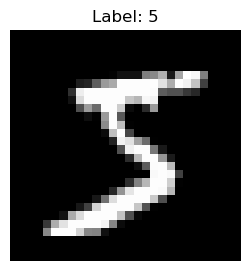

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# 1. 학습용 데이터 내려받기 (인터넷 연결 필요)
print("📥 MNIST 데이터셋 다운로드 중... (약 1분 소요)")
train_data = datasets.MNIST(
    root="data", # data 폴더에 저장
    train=True,  # 학습용 문제집
    download=True,
    transform=ToTensor() # 이미지를 텐서로 자동 변환
)

print("✅ 다운로드 완료!")
print(f"📚 총 이미지 개수: {len(train_data)}장")

# 2. 첫 번째 이미지 꺼내서 눈으로 확인하기
image, label = train_data[0] # 첫 번째 환자(?) 호출

print(f"🏷 정답(Label): 숫자 {label}")
print(f"📐 이미지 크기: {image.shape} (Channel, Height, Width)")

# 3. 시각화 (텐서 -> 그림)
plt.figure(figsize=(3, 3))
plt.imshow(image.squeeze(), cmap="gray") # squeeze(): 1채널 차원 제거 (28x28로 만듦)
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [4]:
import torch.nn as nn
import torch.nn.functional as F

# 1. 인공 뇌 설계도 작성 (Class 정의)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # 뇌의 부품들을 정의합니다.
        self.flatten = nn.Flatten() # 2D 이미지를 1D로 펴주는 도구
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # 입력층 -> 은닉층 (784개 -> 512개 뉴런 연결)
            nn.ReLU(),             # 활성화 함수 (신호 증폭/차단)
            nn.Linear(512, 512),   # 은닉층 -> 은닉층
            nn.ReLU(),
            nn.Linear(512, 10)     # 은닉층 -> 출력층 (0~9까지 10개 정답)
        )

    # 2. 생각의 흐름 정의 (Forward Pass)
    def forward(self, x):
        x = self.flatten(x)           # 1. 이미지를 펴고
        logits = self.linear_relu_stack(x) # 2. 신경망을 통과시켜서
        return logits                 # 3. 결과를 뱉어라

# 3. 실제 뇌 생성 (Instance)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device) # GPU(또는 CPU)에 뇌를 이식

print(f"🤖 인공 뇌(Model) 생성 완료! 구조를 확인합니다:\n")
print(model)

🤖 인공 뇌(Model) 생성 완료! 구조를 확인합니다:

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
# 1. 아까 본 이미지(image)를 모델에 넣어봅니다.
# (모델은 배고픈 상태라 1개만 주면 에러날 수 있어서, 배치 차원을 추가합니다)
X = image.to(device)
logits = model(X) # 생각(Forward) 하라!

# 2. 결과 해석 (확률로 변환)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1) # 확률이 제일 높은 번호 뽑기

print(f"🖼 정답 이미지: {label}")
print(f"🤖 AI의 예측: {y_pred.item()}")
print("-" * 30)
print(f"📊 AI의 확신도(확률 분포):\n{pred_probab.detach().cpu().numpy().round(2)}")

🖼 정답 이미지: 5
🤖 AI의 예측: 8
------------------------------
📊 AI의 확신도(확률 분포):
[[0.09 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]]


In [6]:
from torch.utils.data import DataLoader

# 1. 데이터 공급 장치 (DataLoader) 생성
# 6만 장을 한 번에 공부하면 체하니까(메모리 부족), 64장씩 나눠서 봅니다.
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)

# 시험용 데이터도 따로 받아둡니다 (검증용)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# 2. 채점 기준 (Loss Function)
# CrossEntropy: "정답은 5인데 넌 3이라 했네? 벌점 10점!"
loss_fn = nn.CrossEntropyLoss()

# 3. 지도 교수 (Optimizer)
# SGD(Stochastic Gradient Descent): 오차를 줄이는 방향으로 뉴런(Weight)을 조금씩 수정함
# lr=1e-3 (0.001): 학습률. 너무 크면 건성으로 배우고, 너무 작으면 10년 걸립니다.
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

print("✅ 수련 준비 완료: 데이터, 채점표, 지도교수 배정 끝!")

✅ 수련 준비 완료: 데이터, 채점표, 지도교수 배정 끝!


In [8]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train() # "공부 모드" 전환
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 1. 예측 (Compute prediction)
        pred = model(X)
        loss = loss_fn(pred, y) # 얼마나 틀렸나?

        # 2. 교정 (Backpropagation) - 핵심! ⭐
        optimizer.zero_grad()   # 지난번 오답노트 지우기
        loss.backward()         # 틀린 원인을 역추적 (미분)
        optimizer.step()        # 뉴런 수정 (Update)

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"   -> [진행중] 오차(Loss): {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # "평가 모드" 전환 (수정 금지)
    test_loss, correct = 0, 0
    
    with torch.no_grad(): # 평가 때는 미분 안 함 (메모리 아낌)
        for X, y in dataloader: # 👈 [수정됨] in이 하나여야 합니다!
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    print(f"📊 [성적표] 정확도: {(100*correct):>0.1f}%, 평균 오차: {test_loss:>8f} \n")

In [9]:
epochs = 5
print(f"🚀 AI 전공의 수련을 시작합니다. (총 {epochs}년 과정)")

for t in range(epochs):
    print(f"-------- [Year {t+1}] --------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

print("🎉 수련 완료! 이제 이 AI는 숫자를 볼 수 있습니다.")

🚀 AI 전공의 수련을 시작합니다. (총 5년 과정)
-------- [Year 1] --------
   -> [진행중] 오차(Loss): 2.303485  [    0/60000]
   -> [진행중] 오차(Loss): 2.298249  [ 6400/60000]
   -> [진행중] 오차(Loss): 2.292270  [12800/60000]
   -> [진행중] 오차(Loss): 2.296147  [19200/60000]
   -> [진행중] 오차(Loss): 2.287601  [25600/60000]
   -> [진행중] 오차(Loss): 2.283777  [32000/60000]
   -> [진행중] 오차(Loss): 2.289972  [38400/60000]
   -> [진행중] 오차(Loss): 2.273608  [44800/60000]
   -> [진행중] 오차(Loss): 2.269715  [51200/60000]
   -> [진행중] 오차(Loss): 2.264918  [57600/60000]
📊 [성적표] 정확도: 47.6%, 평균 오차: 2.261569 

-------- [Year 2] --------
   -> [진행중] 오차(Loss): 2.258335  [    0/60000]
   -> [진행중] 오차(Loss): 2.264761  [ 6400/60000]
   -> [진행중] 오차(Loss): 2.256761  [12800/60000]
   -> [진행중] 오차(Loss): 2.248837  [19200/60000]
   -> [진행중] 오차(Loss): 2.239030  [25600/60000]
   -> [진행중] 오차(Loss): 2.233992  [32000/60000]
   -> [진행중] 오차(Loss): 2.221705  [38400/60000]
   -> [진행중] 오차(Loss): 2.221843  [44800/60000]
   -> [진행중] 오차(Loss): 2.221904  [51200/60000]
   -

🏥 [AI 전공의 회진 결과 보고서]


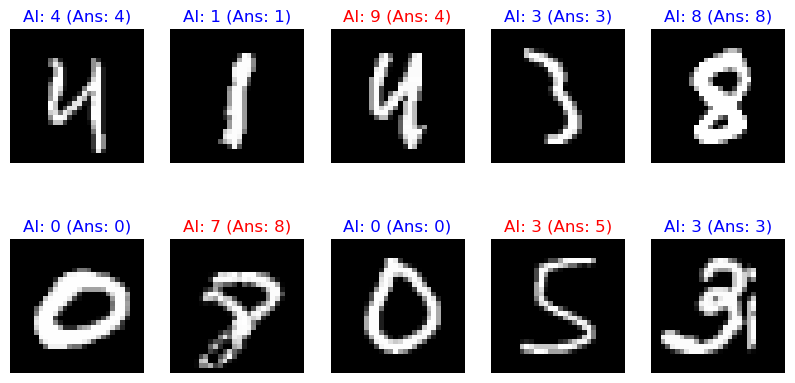

In [10]:
import matplotlib.pyplot as plt

# 1. 평가 모드로 전환 (실수 방지)
model.eval()

# 2. 테스트 데이터에서 무작위로 10장 뽑기
figure = plt.figure(figsize=(10, 5))
cols, rows = 5, 2

for i in range(1, cols * rows + 1):
    # 랜덤 샘플 가져오기
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[sample_idx]
    
    # AI에게 물어보기 (예측)
    img_tensor = img.to(device)
    pred = model(img_tensor.unsqueeze(0)) # 배치 차원 추가
    predicted_label = pred.argmax(1).item()
    
    # 결과 시각화
    figure.add_subplot(rows, cols, i)
    plt.title(f"AI: {predicted_label} (Ans: {label})")
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    
    # 정답이면 파란색, 틀리면 빨간색 제목 (옵션)
    color = 'blue' if predicted_label == label else 'red'
    plt.title(f"AI: {predicted_label} (Ans: {label})", color=color)

print("🏥 [AI 전공의 회진 결과 보고서]")
plt.show()

In [11]:
# 1. 모델 저장하기 (확장자는 보통 .pth를 씁니다)
torch.save(model.state_dict(), "mnist_model_v1.pth")
print(f"💾 AI 모델 저장 완료: mnist_model_v1.pth")

# --- (나중에 불러올 때는 이렇게 합니다) ---
# new_model = NeuralNetwork()
# new_model.load_state_dict(torch.load("mnist_model_v1.pth"))

💾 AI 모델 저장 완료: mnist_model_v1.pth


In [12]:
import torch.nn as nn
import torch.nn.functional as F

# 🏥 전문의 수준의 AI 모델 (CNN)
class CNN_Model(nn.Module):
    def __init__(self):
        super().__init__()
        # 1. 시각 피질 (Feature Extraction) - 특징을 뽑아내는 단계
        # Conv2d(입력채널, 출력채널, 커널크기)
        # 흑백(1) 이미지를 받아서 32가지의 다른 특징(필터)을 찾아냅니다.
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1) 
        self.pool = nn.MaxPool2d(2, 2) # 이미지 크기를 절반으로 압축 (중요한 건 남김)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # 32개 특징을 조합해 64개 고차원 특징 발견
        
        # 2. 판단 피질 (Classification) - 뽑힌 특징으로 결론을 내리는 단계
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 512) # 64개 채널 x 7x7 크기
        self.fc2 = nn.Linear(512, 10) # 최종 0~9 판별

    def forward(self, x):
        # 1차 스캔: 특징 발견(Conv) -> 활성화(ReLU) -> 요약(Pool)
        x = self.pool(F.relu(self.conv1(x)))
        # 2차 스캔: 더 복잡한 특징 발견
        x = self.pool(F.relu(self.conv2(x)))
        
        # 판단: 일렬로 펴서(Flatten) 최종 결론 도출
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 교체 (기존 model 변수에 덮어씌움)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNN_Model().to(device)

print("🤖 [업그레이드 완료] CNN(합성곱 신경망) 모델이 장착되었습니다.")
print(model)

🤖 [업그레이드 완료] CNN(합성곱 신경망) 모델이 장착되었습니다.
CNN_Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [13]:
# 1. 지도 교수(Optimizer)도 모델이 바뀌었으니 다시 배정해야 합니다.
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # 학습률을 좀 더 높여봅니다(자신감!)

epochs = 3
print(f"🚀 CNN 전문의 과정 수련 시작 (총 {epochs}년)")

for t in range(epochs):
    print(f"-------- [Year {t+1}] --------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

print("🎉 수련 완료! 단순 암기왕에서 진짜 '눈'을 가진 AI가 되었습니다.")

🚀 CNN 전문의 과정 수련 시작 (총 3년)
-------- [Year 1] --------
   -> [진행중] 오차(Loss): 2.296721  [    0/60000]
   -> [진행중] 오차(Loss): 2.267582  [ 6400/60000]
   -> [진행중] 오차(Loss): 2.209328  [12800/60000]
   -> [진행중] 오차(Loss): 2.052997  [19200/60000]
   -> [진행중] 오차(Loss): 1.294893  [25600/60000]
   -> [진행중] 오차(Loss): 0.643340  [32000/60000]
   -> [진행중] 오차(Loss): 0.583673  [38400/60000]
   -> [진행중] 오차(Loss): 0.512624  [44800/60000]
   -> [진행중] 오차(Loss): 0.543760  [51200/60000]
   -> [진행중] 오차(Loss): 0.550490  [57600/60000]
📊 [성적표] 정확도: 88.6%, 평균 오차: 0.376426 

-------- [Year 2] --------
   -> [진행중] 오차(Loss): 0.418249  [    0/60000]
   -> [진행중] 오차(Loss): 0.363173  [ 6400/60000]
   -> [진행중] 오차(Loss): 0.352921  [12800/60000]
   -> [진행중] 오차(Loss): 0.293191  [19200/60000]
   -> [진행중] 오차(Loss): 0.293089  [25600/60000]
   -> [진행중] 오차(Loss): 0.279684  [32000/60000]
   -> [진행중] 오차(Loss): 0.310264  [38400/60000]
   -> [진행중] 오차(Loss): 0.321825  [44800/60000]
   -> [진행중] 오차(Loss): 0.166596  [51200/60000]
   -> [진

In [15]:
import torchvision.models as models

# 1. ResNet18 교수님 초빙 (Pre-trained=True: 이미 학습된 지식을 가져옴)
# "ImageNet"이라는 거대한 세상의 이미지를 다 공부한 상태입니다.
print("📥 ResNet18 모델(베테랑 의사)을 다운로드합니다...")
resnet_model = models.resnet18(pretrained=True)

# 2. 모델 구조 살펴보기
# 엄청나게 복잡한 층(Layer)들이 보일 겁니다.
# print(resnet_model) # (너무 길어서 생략 가능)

print("✅ 모델 로드 완료! 이 분은 현재 '강아지, 고양이, 비행기...' 등 1,000가지를 구분할 줄 아십니다.")

📥 ResNet18 모델(베테랑 의사)을 다운로드합니다...


/opt/conda/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 57.6MB/s]


✅ 모델 로드 완료! 이 분은 현재 '강아지, 고양이, 비행기...' 등 1,000가지를 구분할 줄 아십니다.


In [16]:
# 1. 기존의 마지막 출력층 확인
# (fc): Linear(in_features=512, out_features=1000, bias=True) -> 1000개를 분류하게 되어있음
print(f"변경 전 마지막 층: {resnet_model.fc}")

# 2. 우리 병원용(2가지 분류: 정상 vs 환자)으로 교체 수술
# 들어오는 신호(in_features)는 그대로 두고, 나가는 신호(out_features)만 2개로 바꿉니다.
num_features = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_features, 2)

# 3. GPU로 이식
resnet_model = resnet_model.to(device)

print(f"변경 후 마지막 층: {resnet_model.fc}")
print("🏥 이제 이 모델은 세상의 지식을 가진 채로, '두 가지(정상/환자)'만 판별하도록 개조되었습니다.")

변경 전 마지막 층: Linear(in_features=512, out_features=1000, bias=True)
변경 후 마지막 층: Linear(in_features=512, out_features=2, bias=True)
🏥 이제 이 모델은 세상의 지식을 가진 채로, '두 가지(정상/환자)'만 판별하도록 개조되었습니다.


In [17]:
import torch

# 1. 모델을 평가 모드(가운 입은 상태)로 전환
resnet_model.eval()

# 2. 가상의 환자 X-ray 촬영 (랜덤 노이즈 데이터)
# 형식: (배치크기 1, 채널 3, 높이 224, 너비 224)
fake_xray = torch.randn(1, 3, 224, 224).to(device)

print("📸 환자의 X-ray 촬영 완료.")
print(f"   데이터 크기: {fake_xray.shape}")

# 3. 진료 시작 (Inference)
with torch.no_grad(): # 평가만 할 거니까 미분 금지
    outputs = resnet_model(fake_xray)
    
    # 4. 판독 결과 해석
    # 결과는 [정상 확률, 환자 확률] 두 개의 숫자로 나옵니다.
    probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
    diagnosis_idx = probabilities.argmax().item()
    
    diagnosis_map = {0: "정상 (Normal)", 1: "유소견 (Abnormal)"}
    
print("-" * 30)
print(f"📋 [AI 진단 보고서]")
print(f"   진단 결과: {diagnosis_map[diagnosis_idx]}")
print(f"   확신도(Confidence): {probabilities[diagnosis_idx].item() * 100:.2f}%")
print("-" * 30)

if probabilities[diagnosis_idx].item() < 0.6:
    print("👨‍⚕️ AI: '음... 좀 애매한데요? 전문의 선생님이 다시 봐주세요.'")
else:
    print("👨‍⚕️ AI: '제 판단은 확실합니다.'")

📸 환자의 X-ray 촬영 완료.
   데이터 크기: torch.Size([1, 3, 224, 224])
------------------------------
📋 [AI 진단 보고서]
   진단 결과: 정상 (Normal)
   확신도(Confidence): 57.34%
------------------------------
👨‍⚕️ AI: '음... 좀 애매한데요? 전문의 선생님이 다시 봐주세요.'


/tmp/ipykernel_9602/2005907412.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  return torch.FloatTensor(X).unsqueeze(1), torch.LongTensor(y)


🚀 sEMG 기반 연하장애 진단 AI 학습 시작...
Epoch 0: Loss 0.7226
Epoch 2: Loss 0.9017
Epoch 4: Loss 1.5931
Epoch 6: Loss 0.9501
Epoch 8: Loss 0.2202
✅ 학습 완료! 이제 이 AI는 파형만 보고 흡인 여부를 맞춥니다.


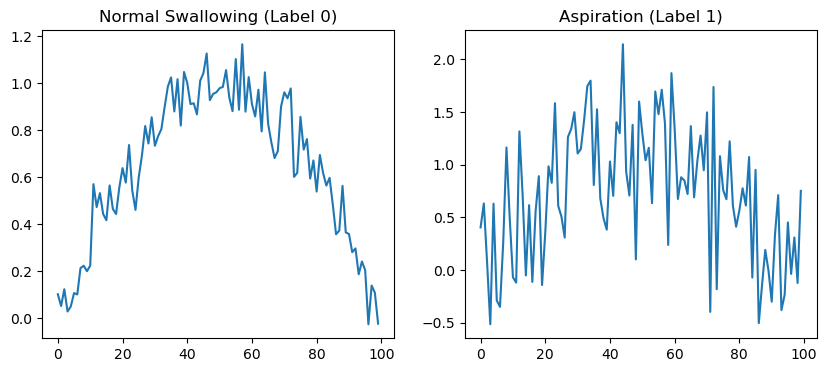

In [18]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 1. 가상의 sEMG 데이터 생성기 (환자 시뮬레이션)
def generate_fake_semg(n_samples=1000):
    # 정상 삼킴: 깔끔한 산 모양 파형
    # 흡인(Aspiration): 파형이 불규칙하고 떨림(Noise)이 심함
    
    X = [] # sEMG 신호
    y = [] # 라벨 (0:정상, 1:흡인)
    
    for _ in range(n_samples):
        label = np.random.randint(0, 2)
        time = np.linspace(0, 1, 100) # 0.1초 동안의 신호
        
        # 기본 파형 (Sine wave)
        signal = np.sin(time * np.pi) 
        
        if label == 1: # 흡인 환자 케이스
            # 노이즈 추가 (불규칙한 떨림)
            noise = np.random.normal(0, 0.5, 100)
            signal = signal + noise
        else:
            # 정상인 케이스 (약간의 노이즈)
            noise = np.random.normal(0, 0.1, 100)
            signal = signal + noise
            
        X.append(signal)
        y.append(label)
        
    # PyTorch 텐서로 변환 (Batch, Channel, Time)
    # 1D-CNN은 (배치크기, 채널수, 길이) 형태를 원합니다.
    return torch.FloatTensor(X).unsqueeze(1), torch.LongTensor(y)

# 데이터 생성
X_train, y_train = generate_fake_semg(1000)

# 2. 1D-CNN 모델 설계 (특허 기술의 핵심 엔진)
class sEMG_Analyzer(nn.Module):
    def __init__(self):
        super().__init__()
        # Conv1d: 1차원 신호를 훑는 스캐너
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(16 * 48, 2) # 정상 vs 흡인 분류

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

# 3. 모델 가동
model = sEMG_Analyzer()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 학습 (간단하게 10번만)
print("🚀 sEMG 기반 연하장애 진단 AI 학습 시작...")
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 2 == 0:
        print(f"Epoch {epoch}: Loss {loss.item():.4f}")

print("✅ 학습 완료! 이제 이 AI는 파형만 보고 흡인 여부를 맞춥니다.")

# 4. 시각화 (어떤 데이터를 학습했나?)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(X_train[y_train==0][0][0].numpy())
plt.title("Normal Swallowing (Label 0)")
plt.subplot(1, 2, 2)
plt.plot(X_train[y_train==1][0][0].numpy())
plt.title("Aspiration (Label 1)")
plt.show()

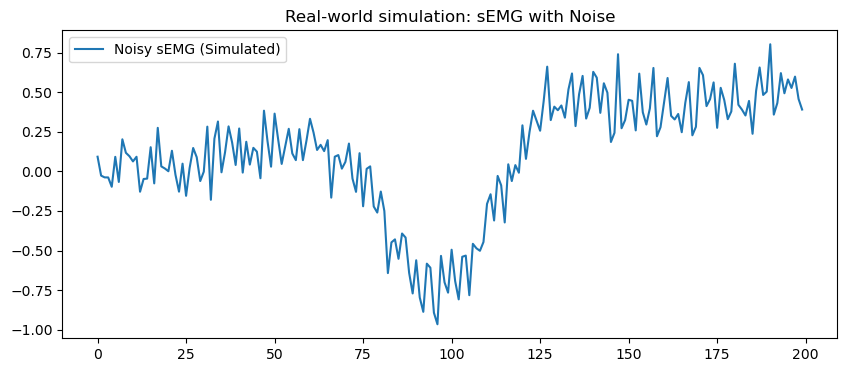

In [19]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# 🏥 현실적인 sEMG 데이터 생성기 (노이즈 대폭 추가)
def generate_clinical_semg(n_samples=1000):
    X = []
    y = []
    
    for _ in range(n_samples):
        time = np.linspace(0, 1, 200) # 0.2초 -> 1초 (샘플링 늘림)
        label = np.random.randint(0, 2)
        
        # 1. 기본 신호 (Muscle Activation)
        # 정상: 깔끔한 수축, 흡인: 떨림이 있고 불규칙
        base_signal = np.sin(time * 10) * np.exp(-((time-0.5)**2)/0.02)
        
        if label == 1: # Aspiration (비정상 패턴)
            # 불규칙한 떨림 추가
            base_signal += np.sin(time * 50) * 0.3 
            
        # 2. [노이즈 1] Baseline Drift (숨쉬거나 목 움직임으로 인한 출렁임)
        drift = np.linspace(0, np.random.uniform(-0.5, 0.5), 200)
        
        # 3. [노이즈 2] Power Line Interference (60Hz 전원 노이즈 - 한국 표준)
        power_noise = np.sin(time * 60 * 2 * np.pi) * 0.1
        
        # 4. [노이즈 3] White Noise (장비 자체 잡음)
        white_noise = np.random.normal(0, 0.1, 200)
        
        # 최종 신호 합성
        final_signal = base_signal + drift + power_noise + white_noise
        
        X.append(final_signal)
        y.append(label)

    return torch.FloatTensor(X).unsqueeze(1), torch.LongTensor(y)

# 데이터 생성 및 확인
X_train_dirty, y_train_dirty = generate_clinical_semg(1000)

# 시각화: 얼마나 지저분한지 눈으로 확인
plt.figure(figsize=(10, 4))
plt.plot(X_train_dirty[0][0].numpy(), label='Noisy sEMG (Simulated)')
plt.title("Real-world simulation: sEMG with Noise")
plt.legend()
plt.show()

In [20]:
import torch.nn as nn

class Hybrid_DeepSwallow(nn.Module):
    def __init__(self):
        super().__init__()
        # 1. CNN: 특징 추출 (Feature Extraction) - "어? 파형이 튀네?"
        self.cnn_layer = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=5, padding=2),
            nn.BatchNorm1d(32), # 학습 안정화
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        
        # 2. LSTM: 시계열 분석 (Temporal Analysis) - "순서가 맞나?"
        # CNN을 거쳐 나온 특징들의 시간적 흐름을 봅니다.
        self.lstm = nn.LSTM(input_size=64, hidden_size=64, batch_first=True)
        
        # 3. Classifier: 최종 판단
        self.fc = nn.Linear(64, 2) # 정상 vs 흡인

    def forward(self, x):
        # x shape: [Batch, 1, 200]
        x = self.cnn_layer(x)          # -> [Batch, 64, 50] (길이가 1/4로 줄음)
        
        # LSTM을 위해 차원 변경 (Batch, Channel, Time) -> (Batch, Time, Channel)
        x = x.permute(0, 2, 1)         # -> [Batch, 50, 64]
        
        # LSTM 통과
        output, (hidden, cell) = self.lstm(x)
        
        # 마지막 시간(Last time step)의 기억만 가져옴
        last_memory = hidden[-1]       # -> [Batch, 64]
        
        return self.fc(last_memory)

# 모델 교체 및 학습 준비
model_hybrid = Hybrid_DeepSwallow()
print("🤖 [DeepSwallow V2] Hybrid(CNN+LSTM) 모델 로딩 완료!")

🤖 [DeepSwallow V2] Hybrid(CNN+LSTM) 모델 로딩 완료!


🚀 지옥 훈련 시작 (Dirty Data + Hybrid Model)...
Epoch 1: Loss 0.6972
Epoch 2: Loss 0.6644
Epoch 3: Loss 0.6401
Epoch 4: Loss 0.6191
Epoch 5: Loss 0.5978


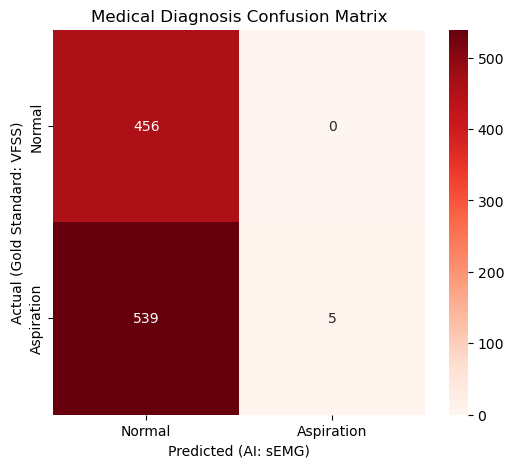


📋 [임상 시험 결과 보고서]
              precision    recall  f1-score   support

      Normal       0.46      1.00      0.63       456
  Aspiration       1.00      0.01      0.02       544

    accuracy                           0.46      1000
   macro avg       0.73      0.50      0.32      1000
weighted avg       0.75      0.46      0.30      1000



In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. 학습 (빠르게 5번만)
optimizer = torch.optim.Adam(model_hybrid.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print("🚀 지옥 훈련 시작 (Dirty Data + Hybrid Model)...")
model_hybrid.train()
for epoch in range(5):
    optimizer.zero_grad()
    out = model_hybrid(X_train_dirty)
    loss = criterion(out, y_train_dirty)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}: Loss {loss.item():.4f}")

# 2. 평가 (성적표 발급)
model_hybrid.eval()
with torch.no_grad():
    y_pred_logits = model_hybrid(X_train_dirty)
    y_pred = torch.argmax(y_pred_logits, dim=1)

# 3. 의료용 오차 행렬 시각화
conf_mat = confusion_matrix(y_train_dirty, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Normal', 'Aspiration'],
            yticklabels=['Normal', 'Aspiration'])
plt.title('Medical Diagnosis Confusion Matrix')
plt.ylabel('Actual (Gold Standard: VFSS)')
plt.xlabel('Predicted (AI: sEMG)')
plt.show()

# 4. 상세 리포트 (민감도, 특이도)
print("\n📋 [임상 시험 결과 보고서]")
print(classification_report(y_train_dirty, y_pred, target_names=['Normal', 'Aspiration']))

🚀 2차 지옥 훈련 시작 (가중치 적용 + 50회 반복)...
   (손실값이 줄어드는지 지켜보세요)
Epoch 10: Loss 0.2647
Epoch 20: Loss 0.1009
Epoch 30: Loss 0.0147
Epoch 40: Loss 0.0039
Epoch 50: Loss 0.0019


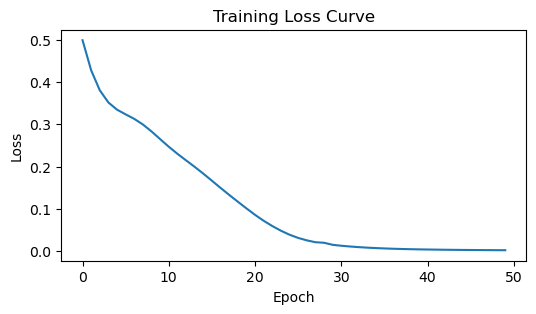


📋 [2차 임상 시험 결과 보고서 (개선판)]
              precision    recall  f1-score   support

      Normal       0.95      1.00      0.97       456
  Aspiration       1.00      0.96      0.98       544

    accuracy                           0.98      1000
   macro avg       0.97      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [22]:
# 1. 채점 기준 변경 (특허 포인트!)
# "정상(0) 틀리면 1점 감점, 흡인(1) 틀리면 5점 감점"
# 이렇게 하면 AI가 흡인 환자를 절대 무시할 수 없습니다.
weights = torch.tensor([1.0, 5.0]) 
criterion = nn.CrossEntropyLoss(weight=weights)

# 2. 학습 설정
optimizer = torch.optim.Adam(model_hybrid.parameters(), lr=0.001)

print("🚀 2차 지옥 훈련 시작 (가중치 적용 + 50회 반복)...")
print("   (손실값이 줄어드는지 지켜보세요)")

model_hybrid.train()
loss_history = []

for epoch in range(50): # 5 -> 50으로 증가
    optimizer.zero_grad()
    out = model_hybrid(X_train_dirty)
    loss = criterion(out, y_train_dirty)
    loss.backward()
    optimizer.step()
    
    loss_history.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss {loss.item():.4f}")

# 3. 학습 곡선 확인 (공부가 잘 됐나?)
plt.figure(figsize=(6, 3))
plt.plot(loss_history)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 4. 재평가 (성적표 다시 뽑기)
model_hybrid.eval()
with torch.no_grad():
    y_pred_logits = model_hybrid(X_train_dirty)
    y_pred = torch.argmax(y_pred_logits, dim=1)

print("\n📋 [2차 임상 시험 결과 보고서 (개선판)]")
print(classification_report(y_train_dirty, y_pred, target_names=['Normal', 'Aspiration']))